# Molecular Hydrogen H<sub>2</sub> Ground State

Figure 7.1 from Chapter 7 of *Interstellar and Intergalactic Medium* by Ryden & Pogge, 2021, 
Cambridge University Press.

Plot the ground state potential of the H<sub>2</sub> molecule (E vs R) and the bound vibration levels.

Uses files with the H<sub>2</sub> potential curves tabulated by [Sharp, 1971, Atomic Data, 2, 119](https://ui.adsabs.harvard.edu/abs/1971AD......2..119S/abstract).

All of the data files used are in the `H2` subfolder that should accompany this notebook.

In [7]:
%matplotlib inline

import math
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, LogLocator, NullFormatter

# OS-agnostic path handling

from pathlib import Path

# suppress nuisance warnings

import warnings
warnings.filterwarnings('ignore',category=UserWarning, append=True)

## Standard Plot Format

Setup the standard plotting format and make the plot. Fonts and resolution adopted follow CUP style.

In [8]:
figName = 'Fig7_1' 

# graphic aspect ratio = width/height

aspect = 4.0/3.0 # 4:3

# Text width in inches - don't change, this is defined by the print layout

textWidth = 6.0 # inches

# output format and resolution

figFmt = 'png'
dpi = 600

# Graphic dimensions 

plotWidth = dpi*textWidth
plotHeight = plotWidth/aspect
axisFontSize = 10
labelFontSize = 8
lwidth = 0.5
axisPad = 5
wInches = textWidth 
hInches = wInches/aspect

# Plot filename

plotFile = f'{figName}.{figFmt}'

# LaTeX is used throughout for markup of symbols, Times-Roman serif font

plt.rc('text', usetex=True)
plt.rc('font', **{'family':'serif','serif':['Times-Roman'],'weight':'bold','size':'16'})

# Font and line weight defaults for axes

matplotlib.rc('axes',linewidth=lwidth)
matplotlib.rcParams.update({'font.size':axisFontSize})

# axis and label padding

plt.rcParams['xtick.major.pad'] = f'{axisPad}'
plt.rcParams['ytick.major.pad'] = f'{axisPad}'
plt.rcParams['axes.labelpad'] = f'{axisPad}'

## H<sub>2</sub> energy level potential data 

H$_2$ $^{1}\Sigma_{g}^{+}$ ground state data from Sharp 1971:

Potential curve: `H2_1Sigma_g+_potl.dat`:
 * `R` = interproton distance, r, in Angstroms
 * `eV` = potential energy, V(r), in eV
 
Vibrational levels: `H2_1Sigma_g+_v.dat`:
 * `v` = vibrational quantum number
 * `eV` = energy in eV
 * `Rmin` = minimum inter-proton distance in Angstroms
 * `Rmax` = maximum inter-proton distance in Angstroms

In [9]:
potlFile = str(Path("H2") / "H2_1Sigma_g+_potl.dat")
vibFile = str(Path("H2") / "H2_1Sigma_g+_v.dat")

data = pd.read_csv(potlFile,sep=r'\s+',comment='#')
gsR = np.array(data['R'])   # radius in Angstroms
gsE = np.array(data['eV'])  # energy in eV

data = pd.read_csv(vibFile,sep=r'\s+',comment='#')
v = np.array(data['v'])   # vibrational quantum number
vE = np.array(data['eV'])
rMin = np.array(data['Rmin'])
rMax = np.array(data['Rmax'])

# plotting limits

minR = 0.0
maxR = 5.0
minE = -0.5
maxE = 6.0

# Put labels on the vibrational levels?

label_v = True

### Make the Plot

Plot the ground-state potential curve as a thick black line, then draw the vibrational energy levels.

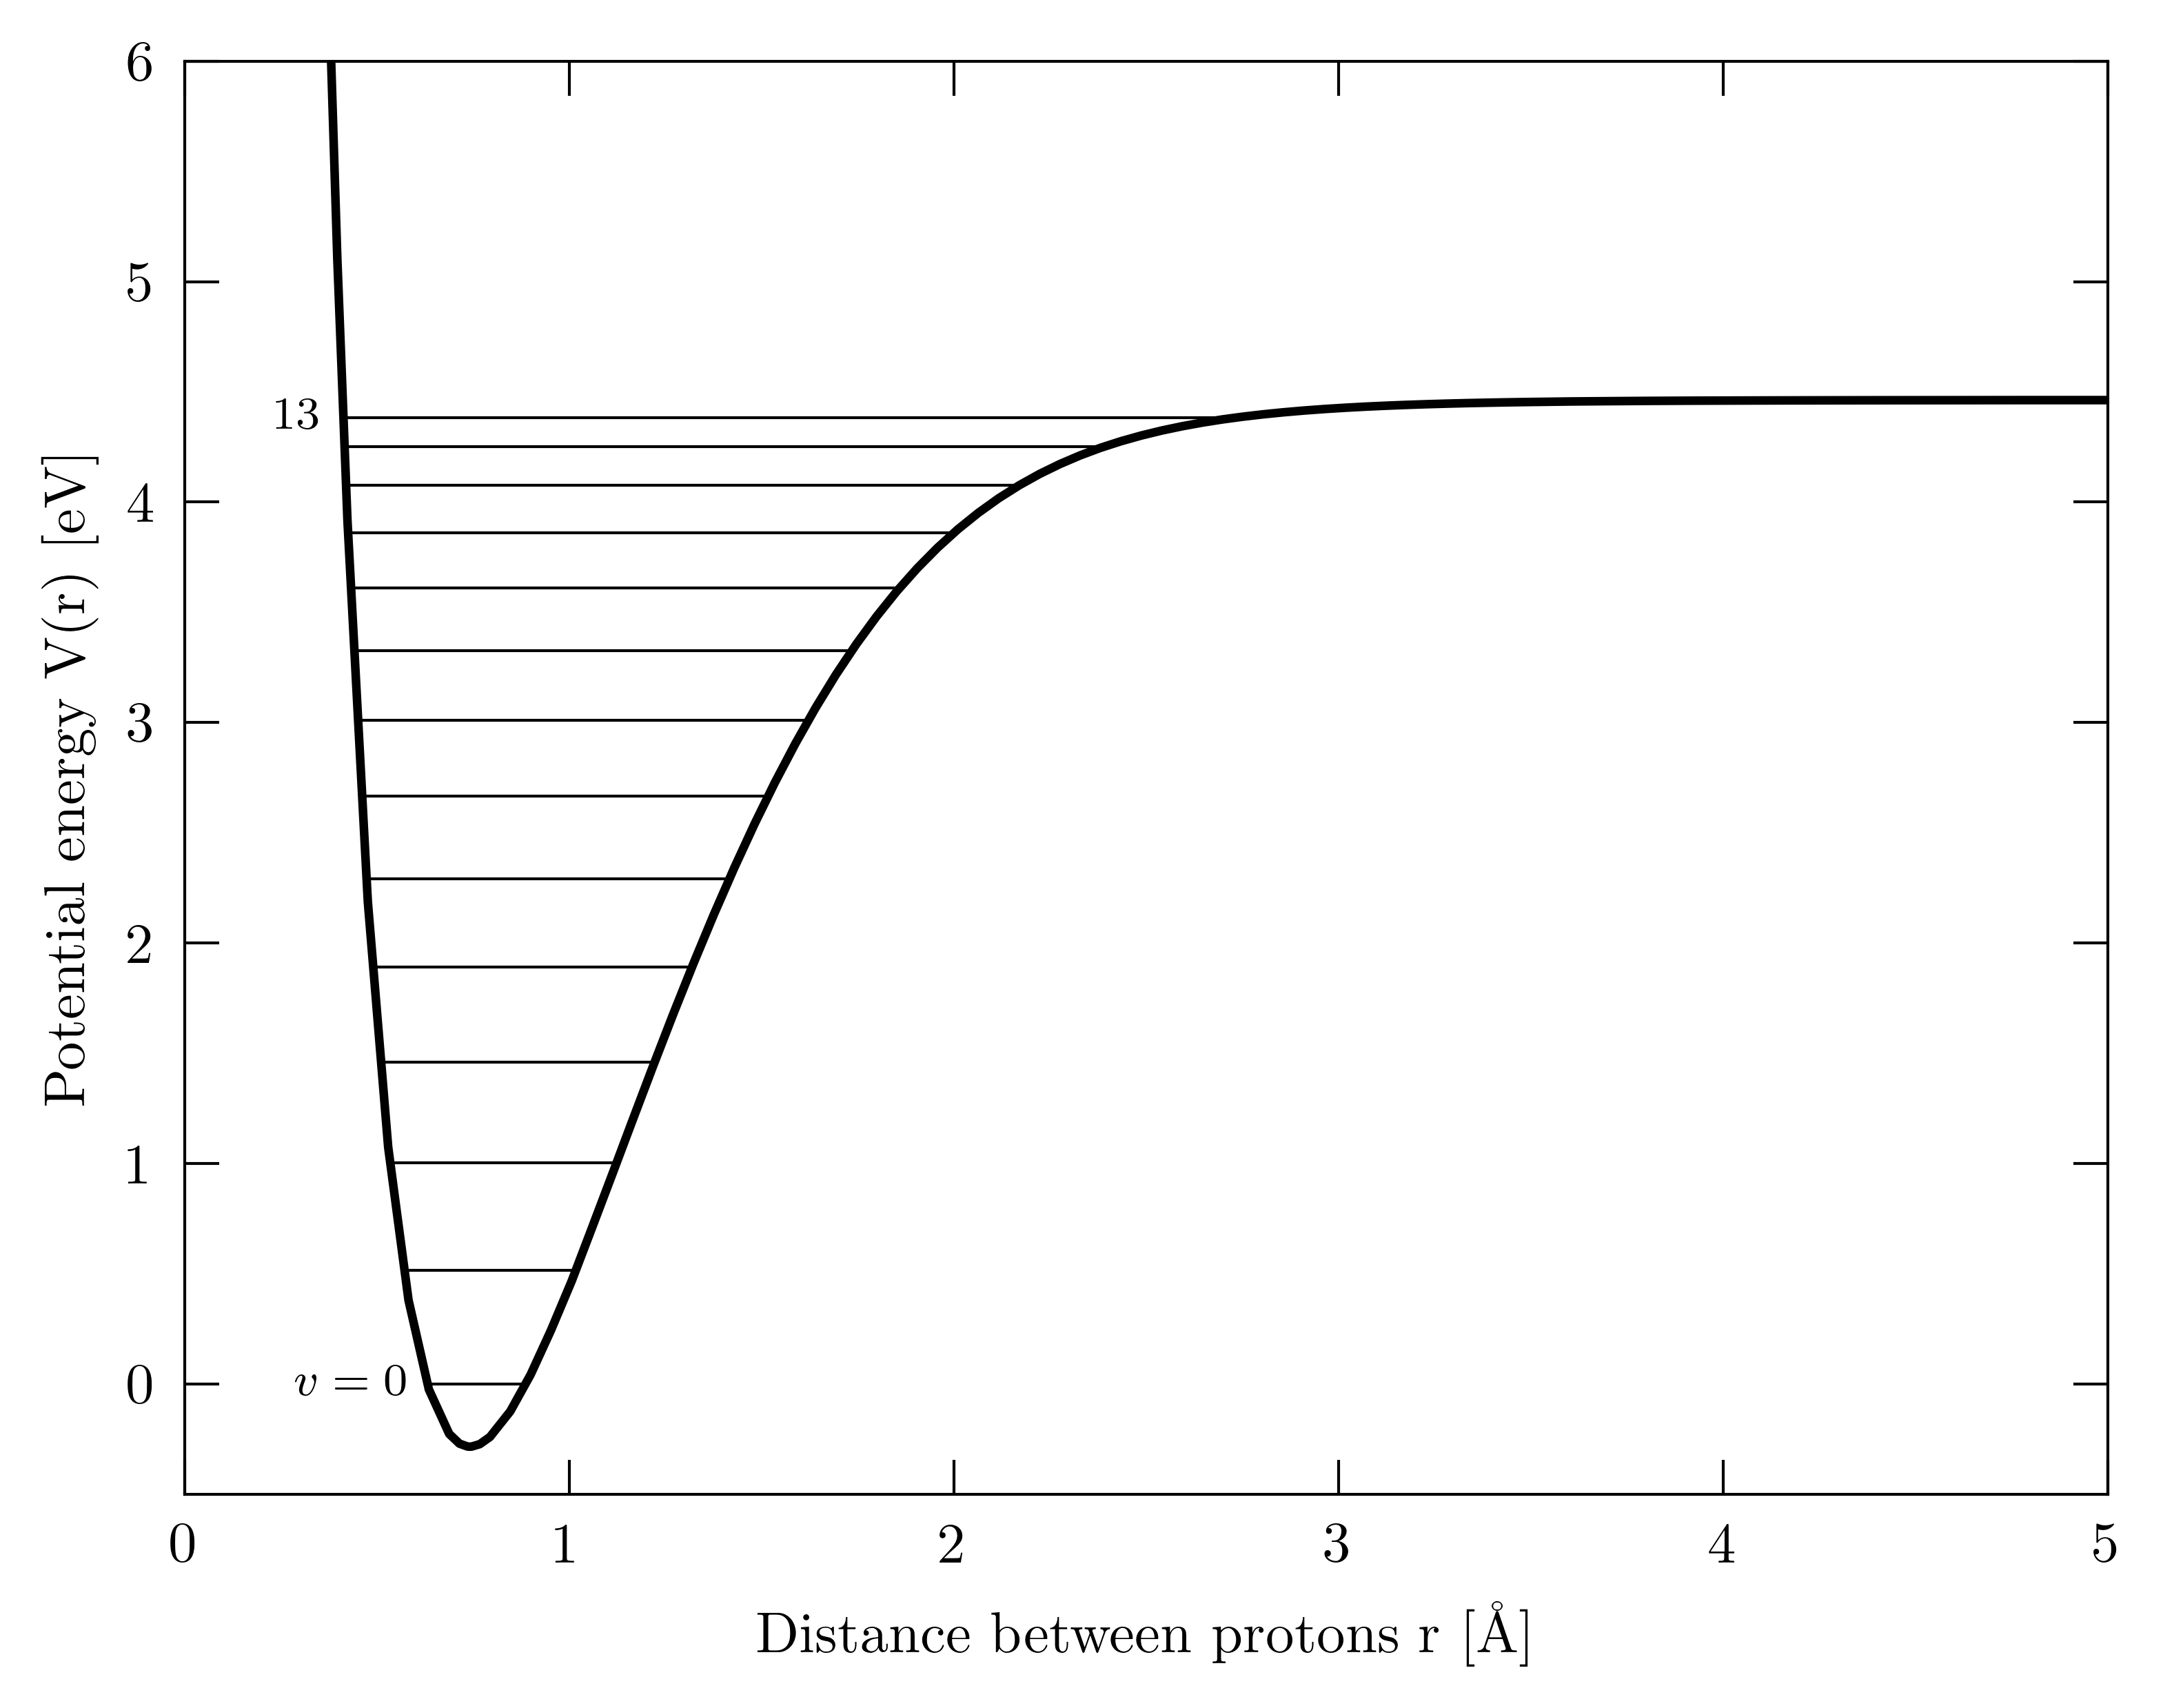

In [10]:
fig,ax = plt.subplots(figsize=(wInches,hInches),dpi=dpi)

ax.tick_params('both',length=6,width=lwidth,which='major',direction='in',top='on',right='on')
ax.tick_params('both',length=3,width=lwidth,which='minor',direction='in',top='on',right='on')

ax.set_xlim(minR,maxR)
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.set_xlabel(r'Distance between protons r [\AA]',fontsize=axisFontSize)

ax.set_ylim(minE,maxE)
ax.yaxis.set_major_locator(MultipleLocator(1.0))
ax.set_ylabel(r'Potential energy V(r) [eV]',fontsize=axisFontSize)

# plot the curves

ax.plot(gsR,gsE,'-',color='black',lw=1.5,zorder=10)

for i in range(len(v)):
    ax.hlines(vE[i],rMin[i],rMax[i],ls=['-'],colors=['black'],lw=0.5,zorder=9)
    if v[i]==0:
        ax.text(rMin[i]-0.05,vE[i],rf'$v={v[i]}$',ha='right',va='center',fontsize=labelFontSize)
    elif v[i]==13:
        ax.text(rMin[i]-0.05,vE[i],rf'${v[i]}$',ha='right',va='center',fontsize=labelFontSize)

# plot and file

plt.savefig(plotFile,bbox_inches='tight',facecolor='white')

plt.show()